In [101]:
##importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [102]:
##importing the dataset
data=pd.read_csv("titanic.csv")

In [103]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [104]:
x=data[["Pclass","Sex","Age","Fare"]]

In [105]:
y=data["Survived"]

In [106]:
x.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [107]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [108]:
##we found null values in the age column
##droping the age column

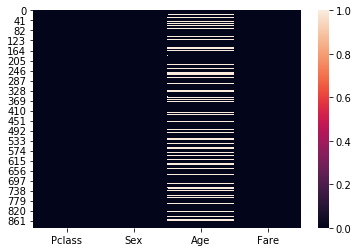

In [109]:
import seaborn as sns
sns.heatmap(x.isnull())

In [110]:
##as a lot of null values is found in the age column lets drop the column
x.drop(["Age"],axis=1,inplace=True)

In [111]:
x.head()

,Pclass,Sex,Fare
0,3,male,7.2500
1,1,female,71.2833
2,3,female,7.9250
3,1,female,53.1000
4,3,male,8.0500


In [112]:
## we have a categorical feature
##creating dummy values

In [113]:
sex = pd.get_dummies(data['Sex'],drop_first=True)

In [114]:
sex

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [115]:
x.drop(["Sex"],axis=1,inplace=True)

In [117]:
##concating the dummy values
x["male"]=pd.concat([sex],axis=1)

C:\Users\prabhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [118]:
x.head()

,Pclass,Fare,male
0,3,7.2500,1
1,1,71.2833,0
2,3,7.9250,0
3,1,53.1000,0
4,3,8.0500,1


In [119]:
##splitting the dataset
from sklearn.model_selection import train_test_split

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [123]:
tree= DecisionTreeClassifier()

In [124]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [126]:
predictions=tree.predict(x_test)

In [127]:
accuracy=accuracy_score(predictions,y_test)

In [128]:
print(f"the accuracy of the model:{accuracy}")

the accuracy of the model:0.7985074626865671
